# AG2 - Actividad Guiada 2

**Nombre**: Marc González Pastor <br>
**Link**:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
**Github**: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>

In [27]:
import math
from typing import List, Tuple, Optional, Sequence, Dict, Any

## Programación Dinámica. Viaje por el río

- **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
- **Características** que permiten identificar problemas aplicables:<br>
  - Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  - Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  - La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

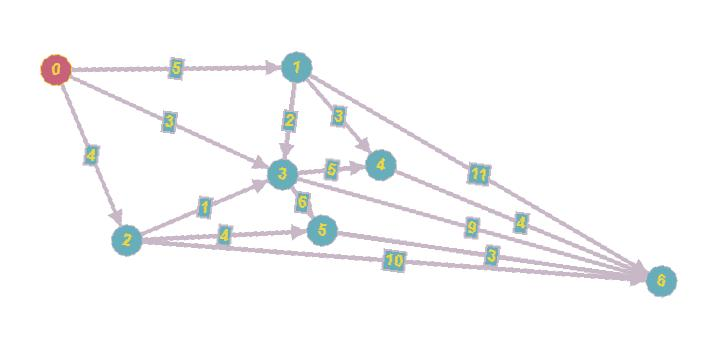

- Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
- Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [5]:
# Viaje por el río — Programación dinámica
# tarifas[i][j] = coste de ir del nodo i al nodo j
# Si no es posible, se usa un valor alto (p. ej. 999) o infinito.

INF = float('inf')

tarifas = [
    [0, 5, 4, 3, INF, INF, INF],        # desde nodo 0
    [INF, 0, INF, 2, 3, INF, 11],       # desde nodo 1
    [INF, INF, 0, 1, INF, 4, 10],       # desde nodo 2
    [INF, INF, INF, 0, 5, 6, 9],
    [INF, INF, INF, INF, 0, INF, 4],
    [INF, INF, INF, INF, INF, 0, 3],
    [INF, INF, INF, INF, INF, INF, 0]
]

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [7]:
def calcular_precios_ruta(tarifas: List[List[float]]) -> Tuple[List[List[float]], List[List[Optional[int]]]]:
    """Calcula las matrices de precios mínimos y nodos para reconstruir rutas.

    precios[i][j] almacena el coste mínimo para ir del nodo i al nodo j (solo para i < j).
    ruta[i][j] almacena el nodo k que permite obtener ese coste mínimo en el último tramo k -> j.
    Si la mejor opción es ir directamente de i a j, entonces ruta[i][j] = i.

    Nota: este algoritmo rellena únicamente la parte superior de las matrices (i < j), asumiendo
    que el recorrido avanza hacia adelante (no hay ciclos ni retrocesos).

    Args:
        tarifas: Matriz cuadrada con los costes directos. Si no hay un camino directo, se debe usar
            un valor alto (ej. float('inf')).

    Returns:
        Una tupla (precios, ruta) donde:
        - precios: Matriz con los costes mínimos para ir de i a j.
        - ruta: Matriz para reconstruir la ruta óptima. Las posiciones no calculadas (i >= j) se dejan como None.
    """
    # Total de nodos
    n = len(tarifas)        # Al ser una matriz cuadrada, len(tarifas) == len(tarifas[0])

    # Inicialización de las matrices de precios y rutas
    precios: List[List[float]] = [[INF] * n for _ in range(n)]
    ruta: List[List[Optional[int]]] = [[None] * n for _ in range(n)]
    for i in range(n):
        precios[i][i] = 0.0
        ruta[i][i] = i

    # Construcción de precios y ruta para cada par (origen, destino)
    for i in range(n - 1):              # Origen
        for j in range(i + 1, n):       # Destino
            minimo = tarifas[i][j]
            ruta[i][j] = i              # Inicialmente, asumimos que la mejor ruta es la directa

            for k in range(i + 1, j):   # Nodo intermedio
                candidato = precios[i][k] + tarifas[k][j]
                if candidato < minimo:
                    minimo = candidato
                    ruta[i][j] = k      # Actualizamos el nodo intermedio

            precios[i][j] = minimo      # Guardamos el coste mínimo encontrado

    return precios, ruta

In [8]:
precios, ruta = calcular_precios_ruta(tarifas)

# print(precios[0][6])  # Ejemplo: coste mínimo de 0 a 6

print("PRECIOS")
for fila in precios:
    print(fila)

print("\nRUTA")
for fila in ruta:
    print(fila)

PRECIOS
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA
[None, 0, 0, 0, 1, 2, 5]
[None, None, 1, 1, 1, 3, 4]
[None, None, None, 2, 3, 2, 5]
[None, None, None, None, 3, 3, 3]
[None, None, None, None, None, 4, 4]
[None, None, None, None, None, None, 5]
[None, None, None, None, None, None, None]


In [10]:
def calcular_ruta(ruta: List[List[Optional[int]]], origen: int, destino: int) -> str:
    """Reconstruye la ruta óptima a partir de la matriz `ruta`.

    La matriz `ruta` se interpreta así:
      - ruta[i][j] = i si el mejor camino es directo i -> j.
      - ruta[i][j] = k (con i < k < j) si el mejor camino termina con k -> j
      y el tramo i -> k debe reconstruirse recursivamente.

    Args:
        ruta: Matriz devuelta por `calcular_precios_ruta`.
        origen: Nodo de inicio.
        destino: Nodo de destino.

    Returns:
        Ruta completa como cadena con nodos separados por comas (p. ej. "0,2,4,6").
    """
    k = ruta[origen][destino]
    if k is None:
        raise ValueError(f"No hay información de ruta para ({origen}, {destino}).")

    if k == origen:
        return f"{origen},{destino}"

    return f"{calcular_ruta(ruta, origen, k)},{destino}"


print("\nLa ruta es:")
calcular_ruta(ruta, 0, 6)

'0,2,5,6'

## Problema de Asignacion de tarea

In [5]:
# Asignación de tareas — Ramificación y Poda
# costes[i][j]: coste de asignar un elemento al otro.
# La tupla solución S se interpreta como: S[i] = asignación elegida para el índice i (agente i asignado a la tarea S[i]).

costes = [
    [11, 12, 18, 40],
    [14, 15, 13, 22],
    [11, 17, 19, 23],
    [17, 14, 20, 28],
]

In [13]:
def valor(solucion: Sequence[int], costes: List[List[float]]) -> float:
    """Calcula el coste acumulado de una solución (parcial o completa).

    Convención:
        solucion[i] = tarea asignada al agente i
        costes[i][t] = coste de asignar la tarea t al agente i

    Por tanto, el coste acumulado es:
        sum(costes[i][solucion[i]]).

    Args:
        solucion: Asignación parcial o completa.
        costes: Matriz cuadrada de costes (n x n).

    Returns:
        Coste total acumulado para las asignaciones ya decididas.
    """
    total = 0.0
    for i in range(len(solucion)):
        total += costes[i][solucion[i]]
    return total

In [14]:
valor((3, 2), costes)

53.0

In [11]:
def cota_inferior(solucion: Sequence[int], costes: List[List[float]]) -> float:
    """Calcula una cota inferior (optimista) del coste total para una solución parcial.

    Parte 1 (coste ya fijado):
        Suma los costes de las asignaciones ya decididas.

    Parte 2 (estimación optimista para completar):
        Para cada columna i no asignada aún (i desde len(solucion) hasta n-1),
        añade el mínimo coste posible en esa columna considerando solo las filas
        j no usadas todavía (j desde len(solucion) hasta n-1).

    Args:
        solucion: Asignación parcial (longitud m). `solucion[i]` es el índice asignado en i.
        costes: Matriz cuadrada de costes (n x n).

    Returns:
        Un valor que actúa como cota inferior del coste de cualquier completación.
    """
    n = len(costes)
    total = 0.0

    # Coste de las asignaciones ya establecidas
    for i in range(len(solucion)):
        total += costes[i][solucion[i]]

    # Estimación optimista para las columnas restantes
    for i in range(len(solucion), n):
        total += min(costes[j][i] for j in range(len(solucion), n))

    return total


def cota_superior(solucion: Sequence[int], costes: List[List[float]]) -> float:
    """Calcula una cota superior (pesimista) del coste total para una solución parcial.

    Misma idea que `cota_inferior`, pero usando máximos en la estimación.

    Args:
        solucion: Asignación parcial.
        costes: Matriz cuadrada de costes (n x n).

    Returns:
        Un valor que actúa como cota superior.
    """
    n = len(costes)
    total = 0.0

    for i in range(len(solucion)):
        total += costes[i][solucion[i]]

    for i in range(len(solucion), n):
        total += max(costes[j][i] for j in range(len(solucion), n))

    return total


cota_inferior((0, 1), costes)

68.0

In [24]:
def crear_hijos(nodo: Tuple[int, ...], n: int) -> List[Dict[str, Tuple[int, ...]]]:
    """Genera los nodos hijos ampliando una solución parcial.

    Dado un nodo (tupla) de longitud m, genera todos los hijos posibles añadiendo
    una nueva tarea en la siguiente posición (agente m), eligiendo entre las tareas
    que aún no aparecen en `nodo`.

    Ejemplo:
        (0,) -> (0, 1), (0, 2), (0, 3)

    Args:
        nodo: Solución parcial (tupla de tareas ya asignadas).
        n: Número total de tareas/agentes (tamaño del problema).

    Returns:
        Lista de diccionarios, cada uno con la clave 's' y la tupla del hijo.
    """
    hijos: List[Dict[str, Tuple[int, ...]]] = []

    for tarea in range(n):
        if tarea not in nodo:
            hijos.append({"s": nodo + (tarea,)})

    return hijos

In [26]:
crear_hijos((0,), 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [28]:
from typing import Dict, List, Tuple, Any

def ramificacion_y_poda(costes: List[List[float]]) -> None:
    """Resuelve el problema de asignación mediante Ramificación y Poda (Branch & Bound).

    Representación:
        Un nodo es un diccionario con:
          - 's': tupla con la solución parcial (tareas asignadas a agentes 0..m-1)
          - 'ci': cota inferior asociada a esa solución parcial

    Estrategia:
        - Selecciona el nodo con menor 'ci' (más prometedor).
        - Genera sus hijos (ramificación).
        - Si aparece una solución completa, actualiza la mejor cota superior.
        - Poda hijos con 'ci' >= cota superior.
        - Repite hasta agotar nodos.
    """
    dimension = len(costes)

    # Solución inicial trivial: (0, 1, 2, ..., n-1)
    mejor_solucion: Tuple[int, ...] = tuple(range(dimension))
    cota_sup = valor(mejor_solucion, costes)

    nodos: List[Dict[str, Any]] = [{"s": (), "ci": cota_inferior((), costes)}]
    iteraciones = 0

    while len(nodos) > 0:
        iteraciones += 1

        # Selección del nodo más prometedor (menor cota inferior)
        nodo_actual = min(nodos, key=lambda x: x["ci"])
        solucion_parcial = nodo_actual["s"]

        # Ramificación: generar hijos y calcular su cota inferior
        hijos = []
        for h in crear_hijos(solucion_parcial, dimension):
            s_hijo = h["s"]
            hijos.append({"s": s_hijo, "ci": cota_inferior(s_hijo, costes)})

        # Si aparece alguna solución completa, actualizamos cota superior si mejora
        soluciones_completas = [x for x in hijos if len(x["s"]) == dimension]
        if len(soluciones_completas) > 0:
            # En tu código original se mira solo la primera; lo mantenemos igual,
            # pero de forma explícita:
            if soluciones_completas[0]["ci"] < cota_sup:
                cota_sup = soluciones_completas[0]["ci"]
                mejor_solucion = soluciones_completas[0]["s"]

        # Poda: nos quedamos con hijos que aún pueden mejorar la cota superior
        hijos = [x for x in hijos if x["ci"] < cota_sup]

        # Añadimos hijos y eliminamos el nodo expandido
        nodos.extend(hijos)
        nodos = [x for x in nodos if x["s"] != solucion_parcial]

    print(
        "La solucion final es:",
        mejor_solucion,
        "con coste",
        cota_sup,
        "en",
        iteraciones,
        "iteraciones",
        "para dimension:",
        dimension,
    )

In [29]:
ramificacion_y_poda(costes)

La solucion final es: (1, 2, 0, 3) con coste 64.0 en 10 iteraciones para dimension: 4


## Descenso del gradiente

In [5]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [8]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

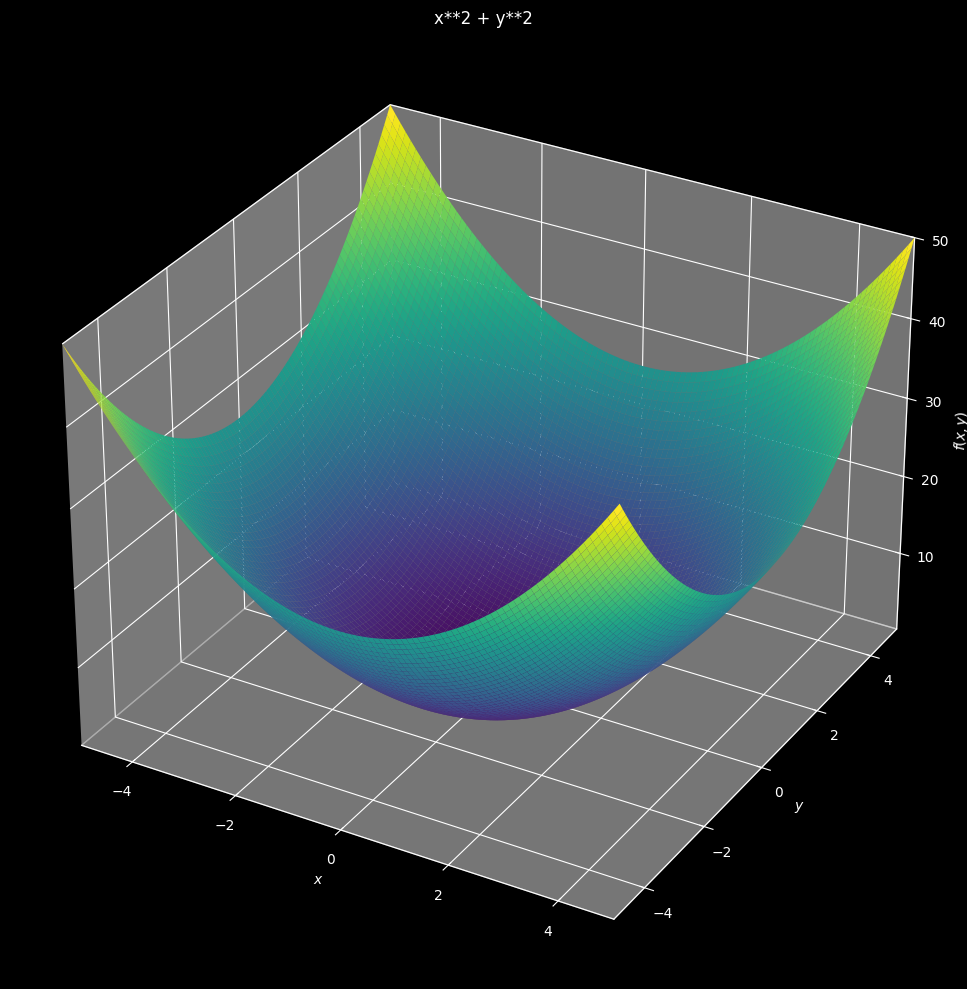

In [9]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

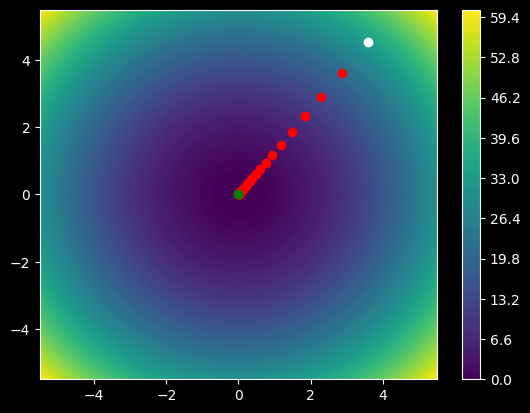

Solucion: [5.12479042255286e-05, 6.469765179790084e-05] 6.8121338356713745e-09


In [10]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
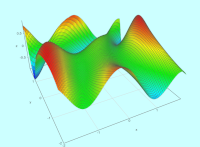


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
